In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
file_path = 'Online Retail.xlsx'

df = pd.read_excel(file_path)

print("5 dòng đầu tiên của dữ liệu:")
print(df.head())
print("\nThông tin tổng quan về dữ liệu:")
df.info()
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

5 dòng đầu tiên của dữ liệu:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column      

Cụ thể, từ kết quả, chúng ta thấy:

Có 541,909 dòng dữ liệu.

Cột CustomerID có 135,080 giá trị thiếu, đây là một vấn đề lớn cần xử lý ngay vì nó là yếu tố cốt lõi để xác định khách hàng.

Cột Description cũng có một số giá trị thiếu nhưng ít hơn.

Quantity là int64 và UnitPrice là float64, InvoiceDate là datetime (tốt).

1. LÀM SẠCH VÀ TIỀN XỬ LÝ DỮ LIỆU

In [7]:
# --- Xử lý giá trị thiếu ---
# CustomerID là yếu tố quan trọng nhất để phân khúc khách hàng.
# Các giao dịch không có CustomerID sẽ không thể gán cho một khách hàng cụ thể.
# Vì vậy, chúng ta sẽ loại bỏ các hàng này.
print(f"Số lượng bản ghi trước khi loại bỏ CustomerID thiếu: {len(df)}")
df.dropna(subset=['CustomerID'], inplace=True)
print(f"Số lượng bản ghi sau khi loại bỏ CustomerID thiếu: {len(df)}")

# Sau khi loại bỏ giá trị thiếu, cột CustomerID có thể vẫn là float do cách Pandas xử lý NaN.
# Chúng ta sẽ chuyển đổi nó sang kiểu số nguyên (int) để đồng nhất.
df['CustomerID'] = df['CustomerID'].astype(int)
print(f"Kiểu dữ liệu của CustomerID sau chuyển đổi: {df['CustomerID'].dtype}")

# Kiểm tra lại số lượng giá trị thiếu sau khi xử lý (để đảm bảo CustomerID đã được xử lý)
print("\nSố lượng giá trị thiếu trong mỗi cột sau khi xử lý CustomerID:")
print(df.isnull().sum())


# --- Xử lý giá trị không hợp lệ trong Quantity và UnitPrice ---
# Quantity (số lượng) và UnitPrice (đơn giá) phải là số dương cho các giao dịch mua hàng hợp lệ.
# Có thể có các bản ghi trả hàng (Quantity âm) hoặc giá trị không hợp lệ (UnitPrice <= 0).
# Chúng ta sẽ loại bỏ những bản ghi này để chỉ giữ lại các giao dịch mua hàng thành công.
print(f"\nSố lượng bản ghi trước khi loại bỏ Quantity và UnitPrice không hợp lệ: {len(df)}")
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print(f"Số lượng bản ghi sau khi loại bỏ Quantity và UnitPrice không hợp lệ: {len(df)}")


# --- Chuyển đổi kiểu dữ liệu InvoiceDate ---
# Đảm bảo cột InvoiceDate có kiểu dữ liệu datetime để dễ dàng thực hiện các phép tính liên quan đến thời gian sau này.
# (Bạn đã làm tốt bước này ở trên, nhưng chúng ta cứ để đây để đảm bảo luồng công việc).
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(f"\nKiểu dữ liệu của InvoiceDate sau chuyển đổi: {df['InvoiceDate'].dtype}")


# --- Tạo cột TotalPrice ---
# Cột này rất quan trọng để tính toán chỉ số Monetary (tổng số tiền chi tiêu của khách hàng).
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("\n5 dòng đầu tiên của DataFrame sau khi làm sạch và thêm TotalPrice:")
print(df.head())
print("\nThông tin tổng quan về DataFrame sau khi làm sạch:")
df.info()

Số lượng bản ghi trước khi loại bỏ CustomerID thiếu: 406829
Số lượng bản ghi sau khi loại bỏ CustomerID thiếu: 406829
Kiểu dữ liệu của CustomerID sau chuyển đổi: int64

Số lượng giá trị thiếu trong mỗi cột sau khi xử lý CustomerID:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Số lượng bản ghi trước khi loại bỏ Quantity và UnitPrice không hợp lệ: 406829
Số lượng bản ghi sau khi loại bỏ Quantity và UnitPrice không hợp lệ: 397884

Kiểu dữ liệu của InvoiceDate sau chuyển đổi: datetime64[ns]

5 dòng đầu tiên của DataFrame sau khi làm sạch và thêm TotalPrice:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT W

CustomerID đã được xử lý triệt để (không còn giá trị thiếu và đã chuyển sang kiểu int64).

Các bản ghi có Quantity hoặc UnitPrice không hợp lệ đã được loại bỏ, giảm số lượng bản ghi từ 406829 xuống còn 397884. Điều này rất quan trọng để đảm bảo dữ liệu tính toán Monetary chính xác.

InvoiceDate đã đúng kiểu datetime64[ns].

Cột TotalPrice đã được tạo thành công và xuất hiện trong df.head() cũng như df.info().

2. XÂY DỰNG CÁC CHỈ SỐ RFM (RECENCY, FREQUENCY, MONETARY)

2.1. Xác định ngày tham chiếu (Snapshot Date)
Để tính toán Recency, chúng ta cần một điểm mốc thời gian. Chúng ta sẽ lấy ngày cuối cùng trong dữ liệu giao dịch của bạn và cộng thêm một ngày. Điều này đảm bảo rằng tất cả các giá trị Recency đều dương và đại diện cho số ngày kể từ lần mua cuối cùng tính đến "hôm nay" (hoặc ngày snapshot).

In [8]:
# Tìm ngày giao dịch cuối cùng trong DataFrame
last_invoice_date = df['InvoiceDate'].max()

# Đặt ngày tham chiếu là một ngày sau ngày giao dịch cuối cùng
# Đây là cách để tính Recency: số ngày từ ngày mua cuối cùng đến ngày "hiện tại" của dữ liệu.
snapshot_date = last_invoice_date + pd.Timedelta(days=1)

print(f"Ngày giao dịch cuối cùng trong dữ liệu: {last_invoice_date}")
print(f"Ngày tham chiếu (Snapshot Date) được sử dụng để tính Recency: {snapshot_date}")

Ngày giao dịch cuối cùng trong dữ liệu: 2011-12-09 12:50:00
Ngày tham chiếu (Snapshot Date) được sử dụng để tính Recency: 2011-12-10 12:50:00


2.2. Tính toán chỉ số RFM cho mỗi khách hàng
Bây giờ, chúng ta sẽ nhóm dữ liệu theo CustomerID và áp dụng các phép tính tổng hợp để có được Recency, Frequency, và Monetary cho mỗi khách hàng.

Recency: Số ngày từ snapshot_date đến ngày mua hàng cuối cùng của khách hàng đó.

Frequency: Số lượng hóa đơn duy nhất (InvoiceNo) của mỗi khách hàng.

Monetary: Tổng số tiền (TotalPrice) mà mỗi khách hàng đã chi tiêu.

In [9]:
# Group by CustomerID và tính toán các chỉ số RFM
rfm = df.groupby('CustomerID').agg(
    # Recency: Số ngày kể từ lần mua cuối cùng. Lấy ngày cuối cùng của InvoiceDate của khách hàng, rồi trừ đi snapshot_date.
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),

    # Frequency: Đếm số lượng InvoiceNo duy nhất của mỗi khách hàng.
    Frequency=('InvoiceNo', 'nunique'),

    # Monetary: Tổng TotalPrice mà khách hàng đã chi tiêu.
    Monetary=('TotalPrice', 'sum')
).reset_index() # reset_index() để CustomerID trở lại thành một cột

print("\nBảng RFM (Recency, Frequency, Monetary) cho mỗi khách hàng:")
print(rfm.head())

print("\nThống kê mô tả của bảng RFM:")
print(rfm.describe())


Bảng RFM (Recency, Frequency, Monetary) cho mỗi khách hàng:
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40

Thống kê mô tả của bảng RFM:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000


3. TIỀN XỬ LÝ DỮ LIỆU CHO K-MEANS CLUSTERING
Thuật toán K-Means rất nhạy cảm với thang đo của dữ liệu và các giá trị ngoại lai. Do đó, chúng ta cần thực hiện biến đổi logarit và chuẩn hóa dữ liệu để mô hình hoạt động hiệu quả hơn.

3.1 Kiểm tra phân phối các chỉ số RFM
Trước khi biến đổi, hãy trực quan hóa phân phối của Recency, Frequency, và Monetary. Bạn sẽ thấy chúng có xu hướng bị lệch phải (right-skewed).

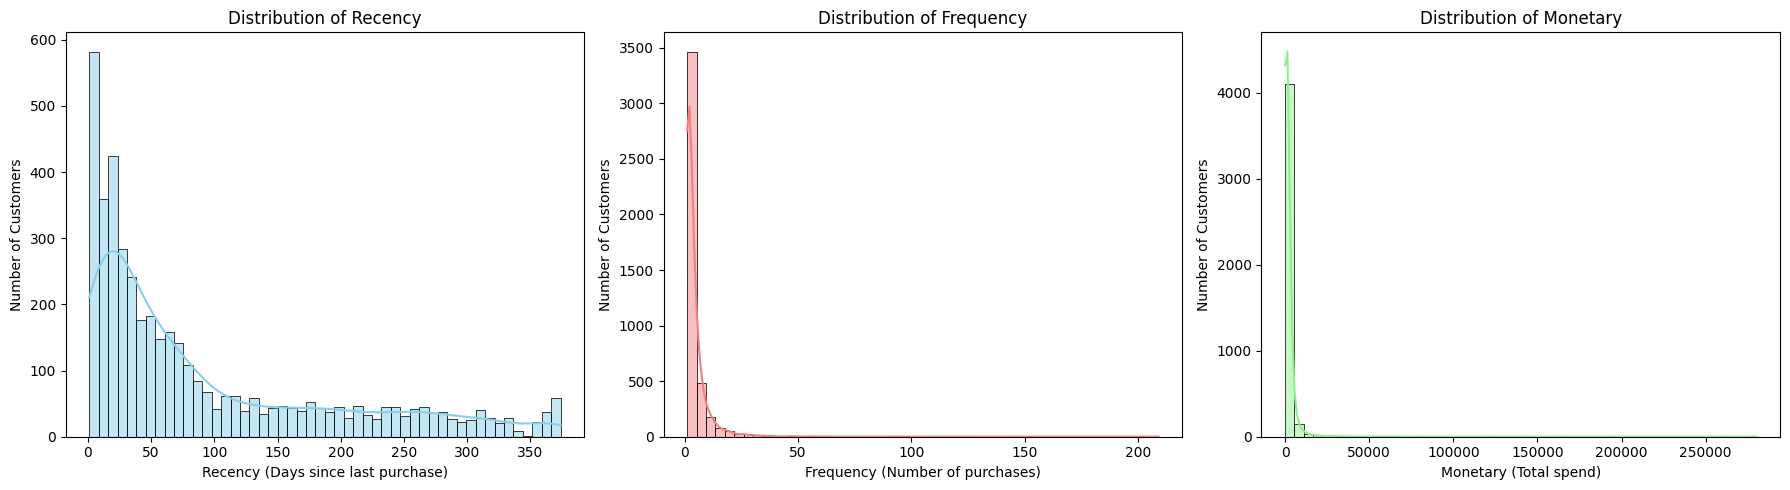

In [10]:
plt.figure(figsize=(18, 5))

# Biểu đồ cho Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Number of Customers')

# Biểu đồ cho Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of purchases)')
plt.ylabel('Number of Customers')

# Biểu đồ cho Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (Total spend)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Rõ ràng cho thấy dữ liệu gốc có phân phối lệch (skewed). Cụ thể, Frequency và Monetary bị lệch phải rất mạnh, với một số lượng lớn khách hàng ở mức giá trị thấp và một số ít khách hàng chi tiêu/mua rất nhiều.

3.2. Áp dụng biến đổi Logarit
Để giảm thiểu tác động của phân phối lệch và các giá trị ngoại lai, chúng ta sẽ áp dụng hàm logarit np.log1p(). Hàm này là log(1+x), giúp xử lý cả các giá trị bằng 0 nếu có (mặc dù trong trường hợp này RFM đều dương).


Bảng RFM sau khi biến đổi logarit (5 dòng đầu):
    Recency  Frequency   Monetary
0  5.789960   0.693147  11.253955
1  1.098612   2.079442   8.368925
2  4.330733   1.609438   7.494564
3  2.995732   0.693147   7.472245
4  5.739793   0.693147   5.815324


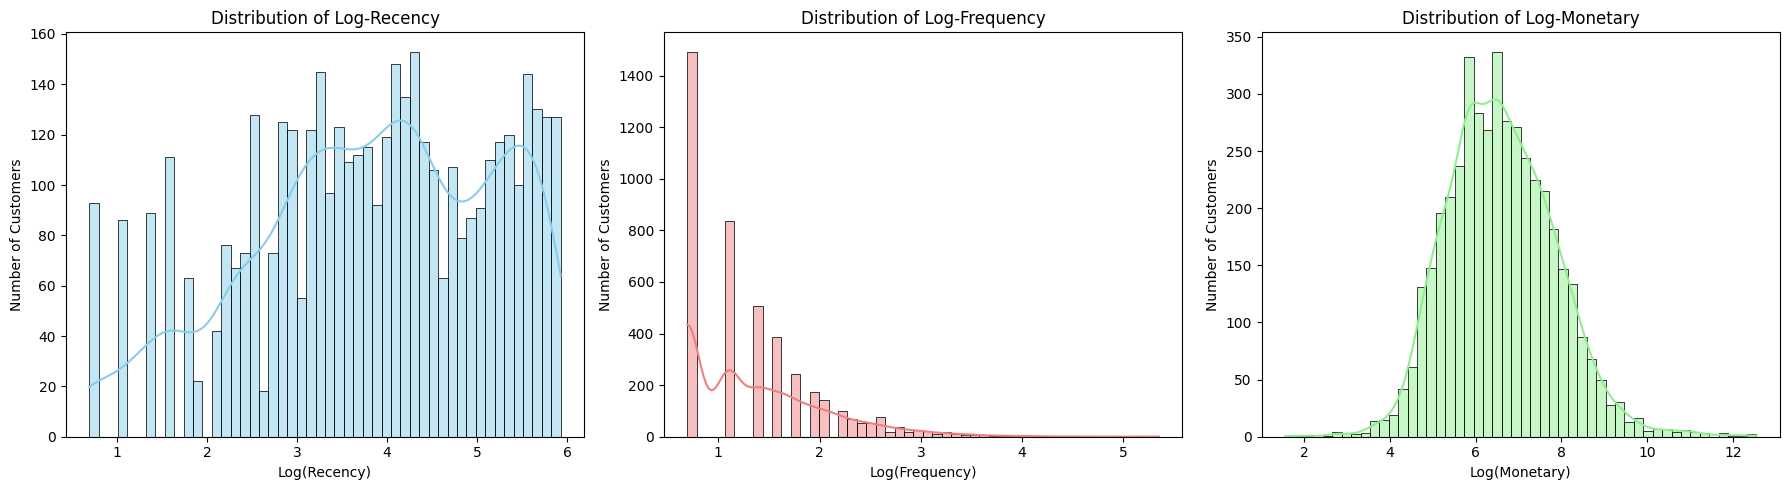

In [11]:
# Áp dụng biến đổi logarit cho các cột RFM
# np.log1p(x) = log(1+x). Hàm này hữu ích khi có các giá trị nhỏ, gần 0.
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

print("\nBảng RFM sau khi biến đổi logarit (5 dòng đầu):")
print(rfm_log.head())

# Kiểm tra lại phân phối sau khi biến đổi (để thấy sự cải thiện)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_log['Recency'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Log-Recency')
plt.xlabel('Log(Recency)')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
sns.histplot(rfm_log['Frequency'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Log-Frequency')
plt.xlabel('Log(Frequency)')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 3)
sns.histplot(rfm_log['Monetary'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Log-Monetary')
plt.xlabel('Log(Monetary)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Biểu đồ sau khi áp dụng np.log1p cho thấy phân phối của các biến đã trở nên đối xứng và gần với phân phối chuẩn hơn rất nhiều (đặc biệt là Monetary), điều này rất tốt cho K-Means. Recency cũng có vẻ phân bố đều hơn.

3.3. Chuẩn hóa dữ liệu
Sau khi biến đổi logarit, các đặc trưng vẫn có thể có thang đo khác nhau (ví dụ: Recency có thể nằm trong khoảng 0-6, trong khi Monetary có thể là 0-15 sau log). K-Means sử dụng khoảng cách Euclidean, vì vậy các đặc trưng có thang đo lớn hơn sẽ có ảnh hưởng lớn hơn đến khoảng cách. Chúng ta cần chuẩn hóa chúng về cùng một thang đo (mean=0, standard deviation=1) bằng StandardScaler.

In [12]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu RFM đã biến đổi logarit
rfm_scaled = scaler.fit_transform(rfm_log)

# Chuyển đổi mảng NumPy đã chuẩn hóa trở lại thành DataFrame
# Giữ lại các tên cột ban đầu và CustomerID để dễ theo dõi.
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm.index)

print("\nBảng RFM sau khi chuẩn hóa (5 dòng đầu):")
print(rfm_scaled_df.head())

print("\nThống kê mô tả của bảng RFM đã chuẩn hóa:")
print(rfm_scaled_df.describe())


Bảng RFM sau khi chuẩn hóa (5 dòng đầu):
    Recency  Frequency  Monetary
0  1.461993  -0.955214  3.706225
1 -2.038734   1.074425  1.411843
2  0.373104   0.386304  0.716489
3 -0.623086  -0.955214  0.698739
4  1.424558  -0.955214 -0.618962

Thống kê mô tả của bảng RFM đã chuẩn hóa:
            Recency     Frequency      Monetary
count  4.338000e+03  4.338000e+03  4.338000e+03
mean  -8.025955e-17 -8.189750e-18  2.817274e-16
std    1.000115e+00  1.000115e+00  1.000115e+00
min   -2.341296e+00 -9.552143e-01 -4.004574e+00
25%   -6.613615e-01 -9.552143e-01 -6.856676e-01
50%    8.992557e-02 -3.615828e-01 -6.218718e-02
75%    8.447915e-01  6.532370e-01  6.541861e-01
max    1.564198e+00  5.858535e+00  4.731591e+00


Các giá trị trong bảng rfm_log đã được nén lại.

    - Bảng rfm_scaled_df cho thấy các giá trị đã được chuẩn hóa, với mean rất gần 0 và std rất gần 1, đây là điều kiện lý tưởng cho K-Means. 
    - Các giá trị min và max cũng đã nằm trong một khoảng hợp lý hơn.

4. PHÂN CỤM KHÁCH HÀNG
    Sử dụng thuật toán K-Means để nhóm các khách hàng thành các cụm dựa trên hành vi RFM của họ. Việc đầu tiên là xác định số lượng cụm (K) tối ưu.

4.1. Tìm số lượng cụm tối ưu bằng Elbow Method
    Phương pháp Elbow giúp chúng ta tìm ra số lượng cụm K tốt nhất. Chúng ta sẽ tính toán WCSS (Within-Cluster Sum of Squares - tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến tâm cụm của nó) cho một dải các giá trị K (ví dụ từ 1 đến 10). Giá trị K tối ưu thường nằm ở điểm "khuỷu tay" nơi mà việc tăng thêm K không làm giảm WCSS đáng kể nữa.

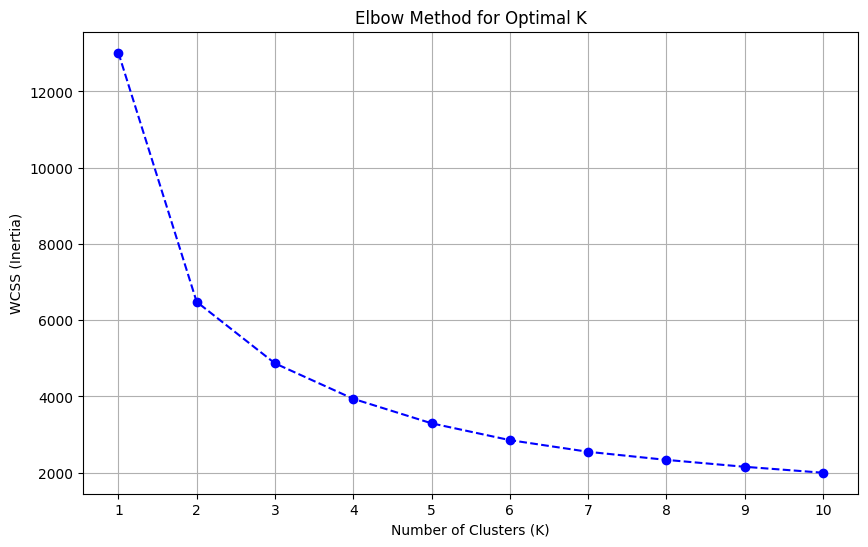

In [13]:
from sklearn.cluster import KMeans

wcss = [] # Danh sách để lưu trữ giá trị WCSS (Inertia)

# Thử nghiệm với số lượng cụm từ 1 đến 10
for i in range(1, 11):
    # Khởi tạo mô hình KMeans
    # n_clusters: số lượng cụm mong muốn
    # init='k-means++': phương pháp khởi tạo tâm cụm giúp hội tụ nhanh hơn và tránh các tâm cụm kém
    # random_state: để đảm bảo kết quả có thể tái lập (tức là mỗi lần chạy sẽ ra cùng một kết quả)
    # n_init=10: chạy thuật toán 10 lần với các khởi tạo tâm cụm ngẫu nhiên khác nhau và chọn kết quả tốt nhất (giúp tránh local optima)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)

    # Huấn luyện mô hình với dữ liệu đã chuẩn hóa
    kmeans.fit(rfm_scaled_df)

    # Lấy giá trị WCSS (inertia_)
    wcss.append(kmeans.inertia_)

# Trực quan hóa kết quả bằng biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.xticks(range(1, 11)) # Đảm bảo trục x hiển thị các số nguyên từ 1 đến 10
plt.show()

Quan sát biểu đồ, điểm "khuỷu tay" (elbow point) rõ ràng nhất dường như nằm ở K=3 hoặc K=4. Sự giảm WCSS trở nên ít đáng kể hơn sau K=4. Việc bạn chọn K=4 là một lựa chọn rất hợp lý và phổ biến trong các dự án RFM segmentation.

4.2. Áp dụng K-Means Clustering với K tối ưu

In [14]:
# CHỌN SỐ LƯỢNG CỤM TỐI ƯU (optimal_k) DỰA TRÊN PHÂN TÍCH BIỂU ĐỒ ELBOW CỦA BẠN.
# Ví dụ: Nếu bạn thấy điểm khuỷu tay ở K=4, hãy đặt optimal_k = 4.
optimal_k = 4 # <--- THAY ĐỔI GIÁ TRỊ NÀY DỰA TRÊN KẾT QUẢ CỦA BẠN!

# Khởi tạo mô hình KMeans với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Huấn luyện mô hình và dự đoán cụm cho từng khách hàng
# fit_predict() sẽ huấn luyện mô hình và trả về nhãn cụm cho mỗi điểm dữ liệu
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

print(f"\nBảng RFM với nhãn cụm được gán (với K={optimal_k}):")
print(rfm.head())

print(f"\nSố lượng khách hàng trong mỗi cụm:")
print(rfm['Cluster'].value_counts().sort_index()) # sort_index() để sắp xếp theo thứ tự cụm


Bảng RFM với nhãn cụm được gán (với K=4):
   CustomerID  Recency  Frequency  Monetary  Cluster
0       12346      326          1  77183.60        2
1       12347        2          7   4310.00        1
2       12348       75          4   1797.24        2
3       12349       19          1   1757.55        0
4       12350      310          1    334.40        3

Số lượng khách hàng trong mỗi cụm:
Cluster
0     837
1     716
2    1173
3    1612
Name: count, dtype: int64


Bảng RFM với nhãn cụm:

Cột Cluster đã được thêm vào DataFrame rfm của bạn, gán một ID cụm cho mỗi khách hàng.

Số lượng khách hàng trong mỗi cụm:

Bạn đã phân phối 4338 khách hàng vào 4 cụm như sau:

Cluster 0: 837 khách hàng

Cluster 1: 716 khách hàng

Cluster 2: 1173 khách hàng

Cluster 3: 1612 khách hàng
Điều này cho thấy các cụm có kích thước khác nhau, điều này là bình thường và thậm chí là mong đợi trong phân khúc khách hàng.

5. PHÂN TÍCH VÀ DIỄN GIẢI KẾT QUẢ PHÂN CỤM

5.1. Tính toán giá trị trung bình RFM cho mỗi cụm
Chúng ta sẽ nhóm DataFrame rfm theo cột Cluster mới được tạo và tính toán giá trị trung bình của Recency, Frequency, và Monetary cho mỗi cụm. Đồng thời, chúng ta sẽ tính số lượng và tỷ lệ phần trăm khách hàng trong mỗi cụm.

In [15]:
# Gộp các cụm và tính trung bình các chỉ số RFM
cluster_summary = rfm.groupby('Cluster').agg(
    Recency_Mean=('Recency', 'mean'),
    Frequency_Mean=('Frequency', 'mean'),
    Monetary_Mean=('Monetary', 'mean'),
    Count=('CustomerID', 'count'), # Đếm số lượng khách hàng trong mỗi cụm
    Percentage=('CustomerID', lambda x: 100 * x.count() / len(rfm)) # Tính tỷ lệ % khách hàng trong mỗi cụm
).reset_index()

# Sắp xếp các cụm để dễ phân tích hơn
# Chúng ta sẽ sắp xếp theo Recency_Mean tăng dần (Recency càng thấp càng tốt - khách hàng mua càng gần đây càng có giá trị)
# Điều này giúp nhóm các cụm "tốt" (Recency thấp) lên đầu.
cluster_summary = cluster_summary.sort_values(by='Recency_Mean', ascending=True).reset_index(drop=True)

print("\nBảng tóm tắt đặc điểm RFM trung bình của từng cụm khách hàng:")
print(cluster_summary)


Bảng tóm tắt đặc điểm RFM trung bình của từng cụm khách hàng:
   Cluster  Recency_Mean  Frequency_Mean  Monetary_Mean  Count  Percentage
0        1     12.131285       13.713687    8074.266872    716   16.505302
1        0     18.124253        2.148148     551.819534    837   19.294606
2        2     71.084399        4.083546    1802.829005   1173   27.040111
3        3    182.496898        1.318238     343.450032   1612   37.159982


Dựa trên bảng cluster_summary và các biểu đồ, chúng ta có thể mô tả các phân khúc khách hàng như sau:

1. Cụm 1: "Khách hàng ưu tú / Trung thành & Giá trị cao nhất" (Elite / Loyal & High-Value Customers)
Kích thước: 716 khách hàng (16.51%)

Recency_Mean: 12.13 ngày (RẤT THẤP -> Mới mua hàng gần đây nhất)

Frequency_Mean: 13.71 giao dịch (RẤT CAO -> Mua sắm thường xuyên nhất)

Monetary_Mean: £8074.27 (RẤT CAO -> Chi tiêu nhiều nhất)

Mô tả: Đây là nhóm khách hàng lý tưởng, những người vừa mua hàng gần đây, mua rất thường xuyên và chi tiêu rất nhiều tiền. Họ là tài sản quý giá nhất của doanh nghiệp.

Đề xuất chiến lược:

Giữ chân và ưu tiên: Triển khai các chương trình khách hàng thân thiết cao cấp, ưu đãi độc quyền.

Upselling/Cross-selling: Giới thiệu sản phẩm mới, cao cấp hoặc liên quan dựa trên lịch sử mua hàng của họ.

Phản hồi: Tìm kiếm phản hồi từ họ để cải thiện sản phẩm/dịch vụ.

2. Cụm 0: "Khách hàng tiềm năng / Mới nổi" (Promising / Emerging Customers)
Kích thước: 837 khách hàng (19.29%)

Recency_Mean: 18.12 ngày (THẤP -> Mới mua hàng gần đây)

Frequency_Mean: 2.15 giao dịch (THẤP)

Monetary_Mean: £551.82 (THẤP)

Mô tả: Nhóm này bao gồm các khách hàng mới hoặc những người đã mua hàng gần đây nhưng chưa mua sắm thường xuyên hoặc chi tiêu nhiều. Họ có tiềm năng trở thành khách hàng trung thành nếu được nuôi dưỡng đúng cách.

Đề xuất chiến lược:

Kích hoạt: Gửi email chào mừng, giới thiệu các sản phẩm phổ biến hoặc ưu đãi cho lần mua hàng tiếp theo.

Khuyến khích Frequency: Thúc đẩy các giao dịch lặp lại thông qua các chương trình khuyến mãi nhỏ, gợi ý sản phẩm phù hợp.

Khuyến khích Monetary: Có thể giới thiệu các gói combo hoặc sản phẩm có giá trị cao hơn một chút.

3. Cụm 2: "Khách hàng cần sự chú ý / Ngủ đông" (Customers Needing Attention / Hibernating Customers)
Kích thước: 1173 khách hàng (27.04%)

Recency_Mean: 71.08 ngày (TRUNG BÌNH -> Đã một thời gian không mua hàng)

Frequency_Mean: 4.08 giao dịch (TRUNG BÌNH)

Monetary_Mean: £1802.83 (TRUNG BÌNH)

Mô tả: Nhóm này đã từng là khách hàng khá tốt (Frequency và Monetary trung bình), nhưng đã một thời gian không mua hàng gần đây. Họ có thể đang "ngủ đông" hoặc chuyển sang đối thủ cạnh tranh.

Đề xuất chiến lược:

Tái kích hoạt: Gửi email cá nhân hóa, nhắc nhở về các sản phẩm yêu thích trước đây hoặc cung cấp ưu đãi đặc biệt để khuyến khích họ quay lại.

Khảo sát: Thực hiện khảo sát nhỏ để hiểu lý do họ ít tương tác hơn.

Giá trị cộng thêm: Nhấn mạnh các lợi ích mới hoặc tính năng cải tiến.

4. Cụm 3: "Khách hàng có nguy cơ rời bỏ / Đã rời bỏ" (At-Risk / Churned Customers)
Kích thước: 1612 khách hàng (37.16%)

Recency_Mean: 182.50 ngày (RẤT CAO -> Đã rất lâu không mua hàng)

Frequency_Mean: 1.32 giao dịch (RẤT THẤP)

Monetary_Mean: £343.45 (RẤT THẤP)

Mô tả: Đây là nhóm khách hàng đã không tương tác với doanh nghiệp trong một thời gian dài, mua rất ít và chi tiêu cũng ít. Khả năng cao họ đã rời bỏ hoặc không còn quan tâm đến sản phẩm/dịch vụ của bạn. Đây là nhóm lớn nhất trong dataset của bạn.

Đề xuất chiến lược:

Tái thu hút mạnh mẽ: Áp dụng các ưu đãi cực kỳ hấp dẫn, phiếu giảm giá lớn hoặc chào hàng sản phẩm mới gây sốc.

Chi phí-hiệu quả: Cân nhắc chi phí cho việc tái thu hút nhóm này. Đôi khi, việc tập trung vào các nhóm có giá trị cao hơn sẽ hiệu quả hơn.

Đánh giá lại: Nếu chiến dịch tái thu hút không hiệu quả, có thể tập trung nguồn lực vào các nhóm khác.

5.2. Trực quan hóa đặc điểm của các cụm
Việc trực quan hóa các giá trị RFM trung bình của mỗi cụm sẽ giúp chúng ta dễ dàng so sánh và hiểu rõ hơn về từng nhóm.

C:\Users\DELL\AppData\Local\Temp\ipykernel_17928\2747152280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Recency_Mean', data=cluster_summary, ax=axes[0], palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17928\2747152280.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Frequency_Mean', data=cluster_summary, ax=axes[1], palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17928\2747152280.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Monetary_Mean', data=cl

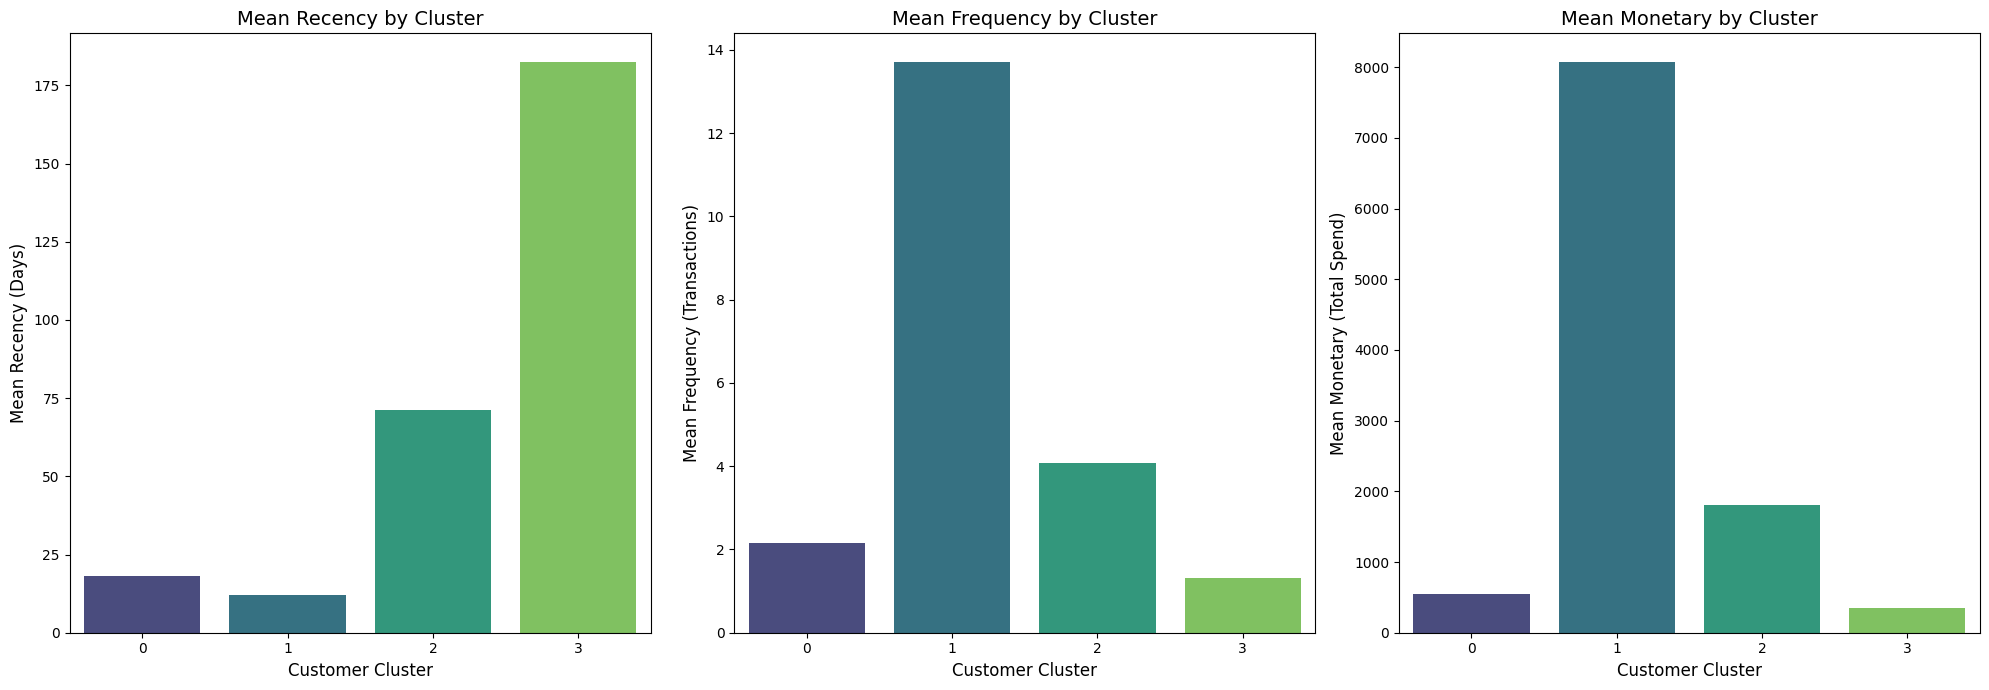

In [16]:
# Tạo biểu đồ thanh cho Recency, Frequency, Monetary theo từng cụm
fig, axes = plt.subplots(1, 3, figsize=(20, 7)) # Tăng kích thước hình để dễ nhìn hơn

# Biểu đồ cho Recency Mean
sns.barplot(x='Cluster', y='Recency_Mean', data=cluster_summary, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Recency by Cluster', fontsize=14)
axes[0].set_xlabel('Customer Cluster', fontsize=12)
axes[0].set_ylabel('Mean Recency (Days)', fontsize=12)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)


# Biểu đồ cho Frequency Mean
sns.barplot(x='Cluster', y='Frequency_Mean', data=cluster_summary, ax=axes[1], palette='viridis')
axes[1].set_title('Mean Frequency by Cluster', fontsize=14)
axes[1].set_xlabel('Customer Cluster', fontsize=12)
axes[1].set_ylabel('Mean Frequency (Transactions)', fontsize=12)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)


# Biểu đồ cho Monetary Mean
sns.barplot(x='Cluster', y='Monetary_Mean', data=cluster_summary, ax=axes[2], palette='viridis')
axes[2].set_title('Mean Monetary by Cluster', fontsize=14)
axes[2].set_xlabel('Customer Cluster', fontsize=12)
axes[2].set_ylabel('Mean Monetary (Total Spend)', fontsize=12)
axes[2].tick_params(axis='x', labelsize=10)
axes[2].tick_params(axis='y', labelsize=10)

plt.tight_layout() # Điều chỉnh bố cục để tránh chồng chéo
plt.show()

a) Biểu đồ "Mean Recency by Cluster" (Recency trung bình theo cụm)
Nhận định:

Cụm 1 có Recency_Mean thấp nhất (khoảng 12 ngày). Điều này có nghĩa là khách hàng trong cụm 1 là những người mua hàng gần đây nhất. Đây là một dấu hiệu tốt về mức độ tương tác hiện tại của họ.

Cụm 0 có Recency_Mean hơi cao hơn Cụm 1 (khoảng 18 ngày), vẫn tương đối thấp. Họ cũng là những người mua hàng khá gần đây.

Cụm 2 có Recency_Mean cao hơn đáng kể (khoảng 71 ngày). Họ đã không mua hàng trong một thời gian tương đối.

Cụm 3 có Recency_Mean cao nhất (khoảng 182 ngày). Điều này cho thấy khách hàng trong cụm 3 đã không mua hàng trong một thời gian rất dài.

b) Biểu đồ "Mean Frequency by Cluster" (Frequency trung bình theo cụm)
Nhận định:

Cụm 1 có Frequency_Mean cao nhất (khoảng 13.7 giao dịch). Điều này cho thấy khách hàng trong cụm 1 là những người mua hàng thường xuyên nhất.

Cụm 2 có Frequency_Mean ở mức trung bình (khoảng 4 giao dịch), cao hơn Cụm 0 và Cụm 3. Họ mua hàng với tần suất khá.

Cụm 0 có Frequency_Mean thấp (khoảng 2.15 giao dịch). Tần suất mua hàng của họ không cao.

Cụm 3 có Frequency_Mean thấp nhất (khoảng 1.3 giao dịch). Họ mua hàng rất ít.

c) Biểu đồ "Mean Monetary by Cluster" (Monetary trung bình theo cụm)
Nhận định:

Cụm 1 có Monetary_Mean cao nhất (khoảng £8074). Đây là những khách hàng chi tiêu nhiều nhất.

Cụm 2 có Monetary_Mean ở mức trung bình (khoảng £1802). Họ đã chi tiêu một số tiền đáng kể.

Cụm 0 có Monetary_Mean thấp (khoảng £551). Lượng tiền họ chi tiêu là tương đối nhỏ.

Cụm 3 có Monetary_Mean thấp nhất (khoảng £343). Đây là những khách hàng chi tiêu ít nhất.

In [17]:
# Đảm bảo bạn có thư mục 'results' trong thư mục gốc của dự án của bạn.
# Nếu chưa có, bạn có thể tạo nó thủ công hoặc chạy lệnh sau trong Python:
import os
output_dir = '../results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Thư mục '{output_dir}' đã được tạo.")

# Lưu DataFrame 'rfm' (đã có cột 'Cluster') vào một file CSV
# index=False để không lưu chỉ mục DataFrame làm cột trong file CSV
output_file_path = os.path.join(output_dir, 'customer_segmentation_rfm_results.csv')
rfm.to_csv(output_file_path, index=False)

print(f"\nKết quả phân cụm đã được lưu vào: '{output_file_path}'")
print("Bạn có thể sử dụng file này để nhập vào SQL hoặc Power BI.")

# Bạn cũng có thể lưu bảng tóm tắt cụm nếu muốn trực quan hóa các đặc điểm trung bình trong Power BI
output_summary_path = os.path.join(output_dir, 'cluster_summary.csv')
cluster_summary.to_csv(output_summary_path, index=False)
print(f"Bảng tóm tắt cụm đã được lưu vào: '{output_summary_path}'")

Thư mục '../results' đã được tạo.

Kết quả phân cụm đã được lưu vào: '../results\customer_segmentation_rfm_results.csv'
Bạn có thể sử dụng file này để nhập vào SQL hoặc Power BI.
Bảng tóm tắt cụm đã được lưu vào: '../results\cluster_summary.csv'
